# Numpy and Pandas

## Objectives: 

- Use numpy.random to generate a dataset.
- Read in various forms of data into a pandas dataframe
- Perform some basic operations on the dataframe 

## Agenda

- Review Numpy
- Introduce Pandas
- Reading in data and merging dataframes (DF)
- working with missing values
- Slicing, selecing and extracting data

## Numpy


NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object

- sophisticated (broadcasting) functions

- tools for integrating C/C++ and Fortran code

- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.


The core functionality of NumPy is its "ndarray", for n-dimensional array, data structure. These arrays are strided views on memory. In contrast to Python's built-in list data structure (which, despite the name, is a dynamic array), these arrays are homogeneously typed: all elements of a single array must be of the same type.



In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import style
style.use('dark_background')
import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
import numpy as np

In [2]:
# Create an array of 25 numbers between -1 and 1
pure = np.linspace(-1, 1, 25)

In [3]:
pure

array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
       -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
       -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
        0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
        0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ])

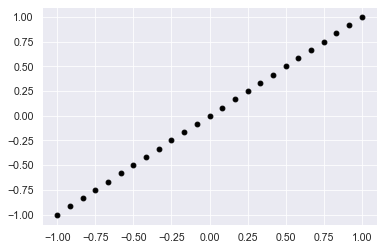

In [4]:
# Create a scatterplot where the x and y both refer to the array created above
plt.plot(pure, pure, 'o', color='black');


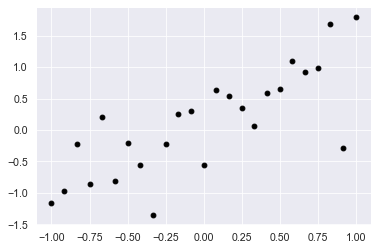

In [5]:
#Add some noise to the data by randomly generating numbers between 0 and .5 to add to the Ys
noise = np.random.normal(0, .5, pure.shape, )
signal = pure + noise
plt.plot(pure, signal, 'o', color='black');


In [6]:
# Graph a log transformation of the numbers
np.random.seed(1234)
pure = np.linspace(0, 10000, 50)
noise = np.random.normal(-.2, .2, pure.shape)
y = np.log(pure)
signal = y + noise

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


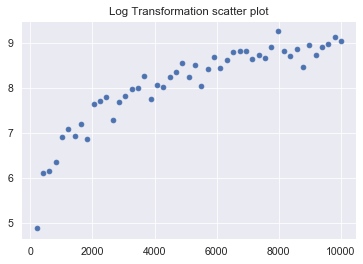

In [9]:
# Create plot
fig, ax = plt.subplots()
ax.scatter(pure, signal)
ax.set_title('Log Transformation scatter plot')

plt.show()

**Use a numpy function to transform the `pure` data series and then create your own scatterplot of the new data with the `pure` data.**


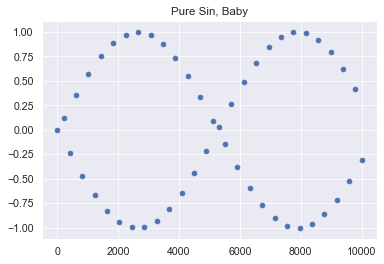

In [21]:
# Create plot
fig, ax = plt.subplots()

#transform your data with a numpy function
pure_sin = np.sin(pure)

#plot the newly retransformed graph
ax.scatter(pure, pure_sin)

#rename your grpah
ax.set_title('Pure Sin, Baby')

plt.show()


## Pandas 

In [22]:
import pandas as pd

### Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

<img src="series-and-dataframe.png" alt="drawing" width="600"/>


## Converting Lists to a Series

In [23]:
my_list = [1,2,3,4,5]
my_numpy_array = np.array([1,2,3,4,5])

In [24]:
my_list_ser = pd.Series(my_list)

In [25]:
my_list_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [26]:
my_numpy_array_ser = pd.Series(my_numpy_array)

In [27]:
my_numpy_array_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [28]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing in

## Creating a Dataframe

A dataframe can be created from many different types of data sources.  Below are different examples of this.  

You can convert a series to a DF for easier viewing. 



In [29]:
pd.DataFrame(my_numpy_array_ser)

,0
0,1
1,2
2,3
3,4
4,5


## Converting different data structures  to DataFrames

### You can use a dict

In [30]:
my_dict = {'my_column_name': ['my', 'column', 'elements', 'go', 'here'],
           'another_column': ['some', 'more', 'data', 'for', 'you']}

In [31]:
my_dict_df = pd.DataFrame(my_dict)

In [32]:
my_dict_df

,my_column_name,another_column
0,my,some
1,column,more
2,elements,data
3,go,for
4,here,you


In [33]:
# You can also use a list of lists, or an array of arrays
headers = ['my', 'column', 'headers']
list_of_lists = [['col_1_val_1', 'col_2_val_1', 'col_3_val_1'],
               ['col_1_val_2', 'col_2_val_2', 'col_3_val_2'],
               ['col_1_val_3', 'col_2_val_3', 'col_3_val_3']]

In [34]:
pd.DataFrame(list_of_lists, columns = headers)

,my,column,headers
0,col_1_val_1,col_2_val_1,col_3_val_1
1,col_1_val_2,col_2_val_2,col_3_val_2
2,col_1_val_3,col_2_val_3,col_3_val_3


### Create a dataframe from a csv file

In [42]:
movies = pd.read_csv('IMDB-Movie-Data.csv', index_col=0)
movies.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [43]:
movies.tail(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### Read CSV from weburl

*If you are doing this from git, make sure you have the url for the raw csv file*

In [40]:
pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Read in excel file

There is a file called `1617FedSchoolCodeList.xlsx` in this directory.Look up how to read an excel file into a dataframe and do it. 

In [44]:

pd.read_excel('1617FedSchoolCodeList.xlsx', index_col='ID')

,SchoolCode,SchoolName,Address,City,StateCode,ZipCode,Province,Country,PostalCode
ID,,,,,,,,,
25969,B04724,WIDENER UNIV SCHOOL OF LAW - DE,4601 CONCORD PIKE/PO BOX 7474,WILMINGTON,DE,19803,NaN,NaN,NaN
25970,B06171,CENTER FOR ADVANCED STUDIES OF PUER,BOX S-4467,SAN JUAN,PR,902,NaN,NaN,NaN
25971,B06511,PENTECOSTAL THEOLOGICAL SEMINARY,PO BOX 3330,CLEVELAND,TN,37320,NaN,NaN,NaN
25972,B07022,THE CHICAGO SCHOOL OF PROF PSYCHOLOGY,325 NORTH WELLS STREET,CHICAGO,IL,60610,NaN,NaN,NaN
25973,B07624,NATIONAL COLLEGE OF NATURAL MEDICINE,049 SW PORTER,PORTLAND,OR,97201,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32926,E40436,FLORIDA CAREER COLLEGE - UEI COLLEGE - H,70-A FARM TO MARKET ROAD 1960 WEST,HOUSTON,TX,77090,NaN,NaN,NaN
32927,042496,WESTCLIFF UNIVERSITY,4199 CAMPUS DRIVE #650,IRVINE,CA,92612,NaN,NaN,NaN
32928,042534,CLOVIS COMMUNITY COLLEGE,10309 NORTH WILLOW AVENUE,FRESNO,CA,93730,NaN,NaN,NaN


### Create from  from json

In [45]:
import json
db = json.load(open('foods-2011-10-03.json'))
len(db)

6636

In [46]:
pd.DataFrame(db)

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...,...,...,...
6631,42161,"Bologna, beef, low fat",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'slice', 'grams': 28.0}...","[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'cup, cooked', 'grams':...","[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",[],None,Baby Foods,"[{'amount': 1, 'unit': 'fl oz', 'grams': 31.2}...","[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",[],None,Baby Foods,"[{'amount': 1, 'unit': 'tbsp', 'grams': 15.0},...","[{'value': 1.1, 'units': 'g', 'description': '..."


In [49]:
flip = pd.read_json('foods-2011-10-03.json', orient='index')
flip.head()

AttributeError: 'list' object has no attribute 'values'

In [50]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


## Familiarizing yourself with the DF

In [51]:
# see the first 5 rows of a DF
movies.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [52]:
# see the last 5 rows of a DF
movies.tail()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [64]:
#look at the columns attribute

movies.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [58]:
#look at the shape attribute
type(movies.shape)

tuple

In [56]:
len(movies.columns)

11

In [72]:
#understanding the different types of data for each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 133.8+ KB


In [69]:
#call on a specific column, can use .head and .tail on series

movies['Actors'].head()

Rank
1    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
2    Noomi Rapace, Logan Marshall-Green, Michael Fa...
3    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
4    Matthew McConaughey,Reese Witherspoon, Seth Ma...
5    Will Smith, Jared Leto, Margot Robbie, Viola D...
Name: Actors, dtype: object

In [70]:
movies['Rating'].mean()

6.723199999999999

In [75]:
#get descriptive stats by columns
movies.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


***Why do you think I'm not getting descrpitive statistics for one all of the columns?***

## Application

1. Create a pandas dataframe using the file `macrodata.csv`.
2. Determine how many columns and rows the dataframe has.
3. Generate some descriptive statistics of the different columns. 

In [83]:
# your code here
data = pd.read_csv('macrodata.csv')
data.shape

(203, 14)

In [86]:
data.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


In [87]:
data[['realgdp','realcons','realinv']].describe()

,realgdp,realcons,realinv
count,203.000000,203.000000,203.000000
mean,7221.171901,4825.293103,1012.863862
std,3214.956044,2313.346192,585.102267
min,2710.349000,1707.400000,259.764000
25%,4440.103500,2874.100000,519.147500
50%,6559.594000,4299.900000,896.210000
75%,9629.346500,6398.150000,1436.681500
max,13415.266000,9363.600000,2264.721000


### Combining Data Frames

In [88]:
#define a ditionary containing employee data
data1 = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 

In [89]:
#Convert the dictionary into DataFrame 
df1 = pd.DataFrame(data1,index=[0, 1, 2, 3])
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


In [90]:
#create a second data frame of employee data to merge the two 
data2 = {'Name':['Gaurav', 'Anuj', 'Dhiraj', 'Hitesh'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 

df2 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
df2.head()

,Name,Age,Address,Qualification,Salary
2,Gaurav,22,Allahabad,MCA,1000
3,Anuj,32,Kannuaj,Phd,2000
6,Dhiraj,12,Allahabad,Bcom,3000
7,Hitesh,52,Kannuaj,B.hons,4000


In [91]:
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


#### Concatenating Dataframes

In [ ]:
# df1.head()
# df2.head()

In [92]:
pd.concat([df1, df2], sort=True, axis=0)

,Address,Age,Mobile No,Name,Qualification,Salary
0,Nagpur,27,97.0,Jai,Msc,NaN
1,Kanpur,24,91.0,Princi,MA,NaN
2,Allahabad,22,58.0,Gaurav,MCA,NaN
3,Kannuaj,32,76.0,Anuj,Phd,NaN
2,Allahabad,22,NaN,Gaurav,MCA,1000.0
3,Kannuaj,32,NaN,Anuj,Phd,2000.0
6,Allahabad,12,NaN,Dhiraj,Bcom,3000.0
7,Kannuaj,52,NaN,Hitesh,B.hons,4000.0


In [93]:
pd.concat([df1, df2], sort=True, axis=1)

,Name,Age,Address,Qualification,Mobile No,Name,Age,Address,Qualification,Salary
0,Jai,27.0,Nagpur,Msc,97.0,NaN,NaN,NaN,NaN,NaN
1,Princi,24.0,Kanpur,MA,91.0,NaN,NaN,NaN,NaN,NaN
2,Gaurav,22.0,Allahabad,MCA,58.0,Gaurav,22.0,Allahabad,MCA,1000.0
3,Anuj,32.0,Kannuaj,Phd,76.0,Anuj,32.0,Kannuaj,Phd,2000.0
6,NaN,NaN,NaN,NaN,NaN,Dhiraj,12.0,Allahabad,Bcom,3000.0
7,NaN,NaN,NaN,NaN,NaN,Hitesh,52.0,Kannuaj,B.hons,4000.0


#### Merging Dataframes

<img src="joinimages.png" alt="drawing" width="550"/>


In [94]:
pd.merge(df1, df2)

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


In [95]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

By calling the merge function on multiple dataframes without any specifications, it tries its best to merge them. It will assess any column that they find to be identical and use those as the merge.

In [96]:
pd.merge(df1, df2, how='inner')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


If we want to keep all data we should do an outer join

In [97]:
pd.merge(df1, df2, how='outer')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Princi,24,Kanpur,MA,91.0,NaN
2,Gaurav,22,Allahabad,MCA,58.0,1000.0
3,Anuj,32,Kannuaj,Phd,76.0,2000.0
4,Dhiraj,12,Allahabad,Bcom,NaN,3000.0
5,Hitesh,52,Kannuaj,B.hons,NaN,4000.0


If you are only concerned with data from one table, then you can specify that table is what you want to merge on.  

In [98]:
pd.merge(df1, df2, how='right')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58.0,1000
1,Anuj,32,Kannuaj,Phd,76.0,2000
2,Dhiraj,12,Allahabad,Bcom,NaN,3000
3,Hitesh,52,Kannuaj,B.hons,NaN,4000


Sometimes you want to be specific in which columns you want the dataframe to merge on

In [104]:
pd.merge(df1, df2, how='right', on=['Name', 'Age'])

,Name,Age,Address_x,Qualification_x,Mobile No,Address_y,Qualification_y,Salary
0,Gaurav,22,Allahabad,MCA,58.0,Allahabad,MCA,1000
1,Anuj,32,Kannuaj,Phd,76.0,Kannuaj,Phd,2000
2,Dhiraj,12,NaN,NaN,NaN,Allahabad,Bcom,3000
3,Hitesh,52,NaN,NaN,NaN,Kannuaj,B.hons,4000


## Data transformation

### Removing duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:


In [ ]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
# method that returns a boolean Series indicating whether each row 
# is a duplicate or not
data[data.duplicated()]

data.drop_duplicates()

If I call `data` again why are there still duplicates?

In [ ]:
data

In [ ]:
data.drop_duplicates(inplace=True)
data

In [ ]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

#we are adding another column to help us understand which row was dropped
data['v1'] = range(7)

data

In [ ]:

data.drop_duplicates(['k1'])

In [ ]:

data.drop_duplicates(['k1'], keep='last')

In [ ]:
myData = data.drop_duplicates(['k1'], keep='last')

### Notice that the index values are no longer incremented evenly by 1
#### df.reset_index() is your friend. More useful applications of reset_index() coming soon!

In [ ]:
myData.reset_index()

## Examining different parts of the data frame

In [ ]:
# movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')
movies.head()

#### There are a few different ways to select data from a dataframe

In [ ]:
# Returns a series
movies['Rank'].head()

In [ ]:
# Returns a dataframe
movies[['Rank']].head()

Now we'll look at getting data by rows.

For rows, we have two options:

- .loc - locates by name
- .iloc- locates by numerical index

Remember that we are still indexed by movie Title, so to use .loc we give it the Title of a movie:



In [ ]:
movies.head(3)

In [ ]:
# use loc to find the row by name
prom = movies.loc["Prometheus"]

prom

In [ ]:
#use iloc to find the row by numerical index

prom = movies.iloc[1,]
prom


`loc` and `iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.


How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [ ]:
movies.loc['Prometheus':'Sing']



In [ ]:
mov_df = movies.loc['Prometheus':'Sing']
mov_df

In [ ]:
# Note that we can use reset_index() to filter upon a numerical index as opposed to a string index
movies_df_reindexed = movies.reset_index()
movies_df_reindexed.head()

In [ ]:
# Now we can index by integer values
movies_df_reindexed.iloc[1:4]

In [ ]:
movies_df.iloc[1:4]



## Conditional selections


For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [ ]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

### In Pandas

In [ ]:
condition = (movies_df['Director'] == "Ridley Scott")

condition

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [ ]:
movies_df[condition]

In [ ]:
movies_df[movies_df['Director'] == "Ridley Scott"]


**Find how many movies were directed by Christopher Nolan.**


In [ ]:
#put your code here
____[____ == _____]

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:



In [ ]:
movies_df[movies_df['Rating'] >= 8.8]


We can make some richer conditionals by using logical operators: 
- `|`    for "or"  
- `&`    for "and"


Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [ ]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')]


** What is the average revenue of all of the movies by Christopher Nolan that have a score of 8.7 or better**

In [ ]:
# your code here

____ = movies_df[(____) & (_____)]

____[_____]._____()

Using the `isin()` method we could make this more concise though:

In [ ]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


Using `~` flips your booleans and allows you to find the inverse of your query.  

In [ ]:
movies_df[~movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


## Applied Question: 

Which group of movies has the higher average revenue those with a rating of above 8, or those with at least 300,000 reviews?

In [ ]:
# Subset the dataframe to find movies with a rating above 8.


In [ ]:
# Find the average revenue of that group.


In [ ]:
# Subset the dataframe to find movies with more than 300,000 votes.


In [ ]:
# find the average of that group
